In [1]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [2]:
### Task 1: Select what features you'll use.
import pandas as pd
import numpy as np

#fpm = "final_project_dataset_modified.pkl" 
fp = "final_project_dataset.pkl"

#fpm_df = pickle.load( open(fpm, "r"))
fp_df = pickle.load( open(fp, "r") )

### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
#fpm_df = pd.DataFrame(fpm_df)
fp_df = pd.DataFrame(fp_df)

#print fp_df.head(5)

### Transpose

Because the rows and columns of dataset are features and samples respectivey, I transposed it to be rows for samples and columns for features. The reason for the transpose is that pandas dataframe provide easy way to extract columns in a dataset using using column's name like *__dataset[variable_name]__* rather than row indice.

In [3]:
fp_df = fp_df.T

#features_list = ['poi','salary'] # You will need to use more features

### Convert NaN to 0

Firstly, convert string type **NaN** value to **np.nan**, so that fillna() function of pandas can work.
Before converting, I inspected how many **NaN** values are in each features. I devided those with total length of data to see the proportion inherent in it.

In [4]:
fp_df.head(5)['bonus']

ALLEN PHILLIP K       4175000
BADUM JAMES P             NaN
BANNANTINE JAMES M        NaN
BAXTER JOHN C         1200000
BAY FRANKLIN R         400000
Name: bonus, dtype: object

Features having **NaN** more than 0.5 might no be useful? I can know about which value can be a threshold with the rate of person of interest.

#### NaN in poi

In [5]:
r_poi = np.sum(fp_df['poi'])/float(len(fp_df))
print 'POI rate: ', np.round(r_poi, 2)

from tqdm import tqdm

def nan_count(data):
    c = 0
    
    for i in data:
        if i == 'NaN':
            c += 1
            
    return c

poi_nan_count = fp_df[fp_df['poi'] == True].apply(nan_count)

nan_df = pd.DataFrame(np.round(poi_nan_count/len(fp_df[fp_df['poi'] == True]), 2), 
                        columns=['NaN_poi'])
#nan_rate.append(poi_nan_count/len(fp_df[fp_df['poi'] == True]))
nan_df

POI rate:  0.12


,NaN_poi
bonus,0.11
deferral_payments,0.72
deferred_income,0.39
director_fees,1.00
email_address,0.00
exercised_stock_options,0.33
expenses,0.00
from_messages,0.22
from_poi_to_this_person,0.22
from_this_person_to_poi,0.22


#### NaN in non-poi

In [6]:
r_poi = (len(fp_df) - np.sum(fp_df['poi']))/float(len(fp_df))
print 'Non POI rate: ', r_poi

from tqdm import tqdm

def nan_count(data):
    c = 0
    
    for i in data:
        if i == 'NaN':
            c += 1
            
    return c

non_poi_nan_count = fp_df[fp_df['poi'] != True].apply(nan_count)
nan_df = nan_df.assign(NaN_non_poi = 
                       pd.DataFrame(np.round(non_poi_nan_count/len(fp_df[fp_df['poi'] != True]), 2), 
                                    columns=['non-poi nan']))

nan_df

Non POI rate:  0.876712328767


,NaN_poi,NaN_non_poi
bonus,0.11,0.48
deferral_payments,0.72,0.73
deferred_income,0.39,0.70
director_fees,1.00,0.87
email_address,0.00,0.27
exercised_stock_options,0.33,0.30
expenses,0.00,0.40
from_messages,0.22,0.44
from_poi_to_this_person,0.22,0.44
from_this_person_to_poi,0.22,0.44


#### Check 0 value in features

Before coverting **NaN** to 0, I have to check the converting would effect each variables or the whole dataset.

#### 0 in poi

In [7]:
r_poi = np.sum(fp_df['poi'])/float(len(fp_df))
print 'POI rate: ', np.round(r_poi, 2)

from tqdm import tqdm

def nan_count(data):
    c = 0
    
    for i in data:
        if i == 0:
            c += 1
            
    return c

feature_nan_count = fp_df[fp_df['poi'] == True].apply(nan_count)
nan_df = nan_df.assign(Zero_poi = 
                       pd.DataFrame(np.round(
                           feature_nan_count/len(fp_df[fp_df['poi'] == True]), 2)))

POI rate:  0.12


#### 0 in non-poi

In [8]:
r_poi = (len(fp_df) - np.sum(fp_df['poi']))/float(len(fp_df))
print 'POI rate: ', r_poi

from tqdm import tqdm

def nan_count(data):
    c = 0
    
    for i in data:
        if i == 0:
            c += 1
            
    return c

feature_nan_count = fp_df[fp_df['poi'] != True].apply(nan_count)
nan_df = nan_df.assign(Zero_non_poi = 
                       pd.DataFrame(np.round(
                           feature_nan_count/len(fp_df[fp_df['poi'] != True]), 2)))

nan_df

POI rate:  0.876712328767


,NaN_poi,NaN_non_poi,Zero_poi,Zero_non_poi
bonus,0.11,0.48,0.0,0.00
deferral_payments,0.72,0.73,0.0,0.00
deferred_income,0.39,0.70,0.0,0.00
director_fees,1.00,0.87,0.0,0.00
email_address,0.00,0.27,0.0,0.00
exercised_stock_options,0.33,0.30,0.0,0.00
expenses,0.00,0.40,0.0,0.00
from_messages,0.22,0.44,0.0,0.00
from_poi_to_this_person,0.22,0.44,0.0,0.09
from_this_person_to_poi,0.22,0.44,0.0,0.16


Larger values in **NaN_poi** and **NaN_non_poi** columns mean there are more **NaNs** in each feature. As **poi** variable is discrete with only *True* and *False* values, the proportion of featurewise sum is 1 for non poi dataset. 

I discarded the features which are over 0.5 in both **NaN_poi** and **NaN_non_poi**, because useful information are missing from the dataset. In addition, individual email addresses were removed as it doesn't represent poi and non-poi groups.

Rate of only two featuresl; **from_poi_to_this_person**, **from_this_person_to_poi** including 0 values are over 0, but the amounts are just 0.09 and 0.16, respectively. It might be assumed that converting **NaN** to 0 would not have affects on poi and non-poi classifier.

In [10]:
features = []
for fn, fv in nan_df.iterrows():
    if not(fv[0] >= 0.5 and fv[1] >= 0.5) and (fn != 'email_address'):
        features.append(fn)
        #print fn

fp_df = fp_df[features]

Convert np.nan value to 0

In [11]:
fp_df = fp_df.applymap(lambda x: np.nan if x == 'NaN' else x)
#fp_df.head()

In [12]:
fp_df.fillna(0, inplace=True)
fp_df.isnull().values.any()
fp_df.head()

,bonus,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,-3081055.0,1729541.0,13868.0,2195.0,47.0,65.0,304805.0,152.0,False,126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,0.0,0.0,257817.0,3486.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,182466.0,257817.0
BANNANTINE JAMES M,0.0,-5104.0,4046157.0,56301.0,29.0,39.0,0.0,0.0,864523.0,False,1757552.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,-1386055.0,6680544.0,11200.0,0.0,0.0,0.0,1586055.0,2660303.0,False,3942714.0,267102.0,0.0,0.0,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,-201641.0,0.0,129142.0,0.0,0.0,0.0,0.0,69.0,False,145796.0,239671.0,0.0,0.0,827696.0,63014.0


### Remove Outlier

In [15]:
len(fp_df.keys())

16

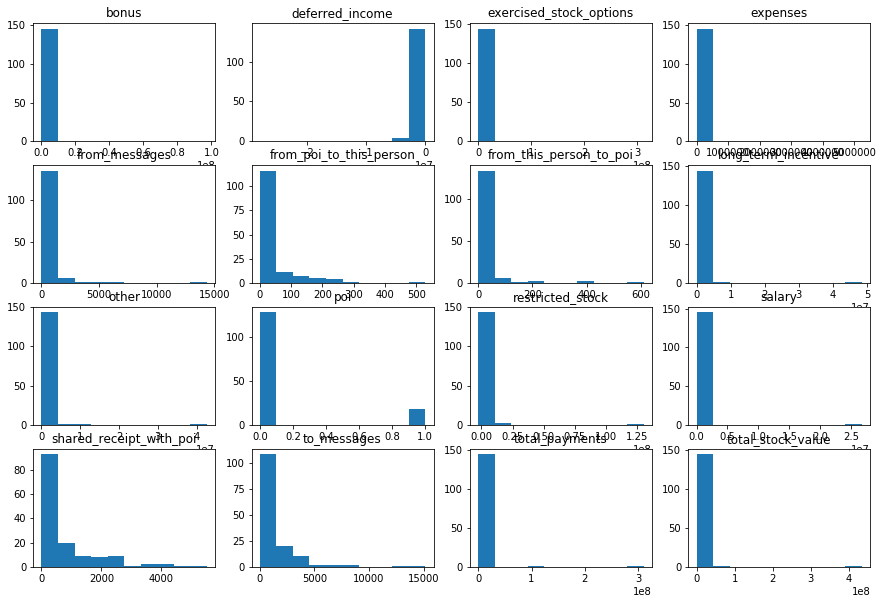

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(4, 4, figsize = (15, 10))

for i in xrange(4):
    for j in xrange(4):
        ax[i, j].hist(fp_df[features[i*4+j]])
        #ax[i, j].plot(x, y_25th, x, y_75th)
        ax[i, j].set_title(features[i*4+j])

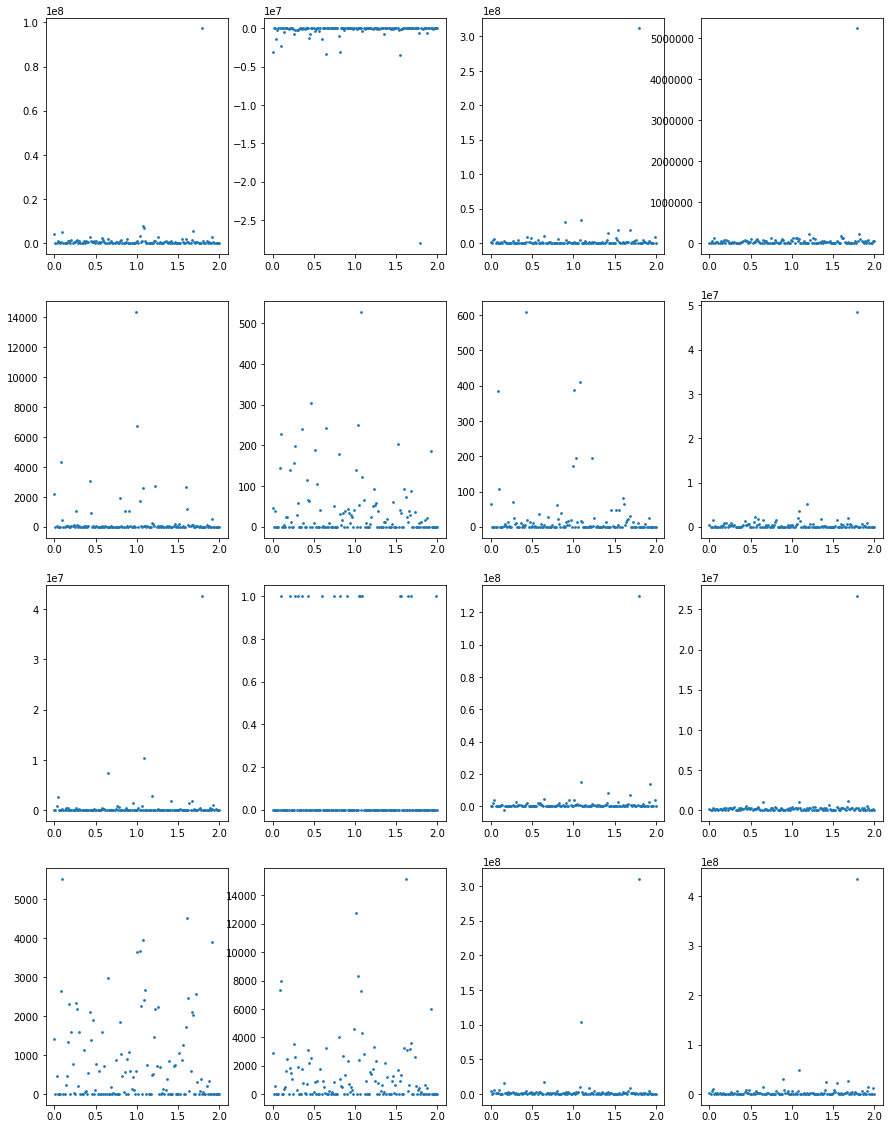

In [19]:
fig, ax = plt.subplots(4, 4, figsize = (15, 20))

for i in xrange(4):
    for j in xrange(4):
    
        x = np.linspace(0, 2, len(fp_df[features[i*4+j]]))
        ax[i, j].scatter(x, fp_df[features[i*4+j]], s = 3)

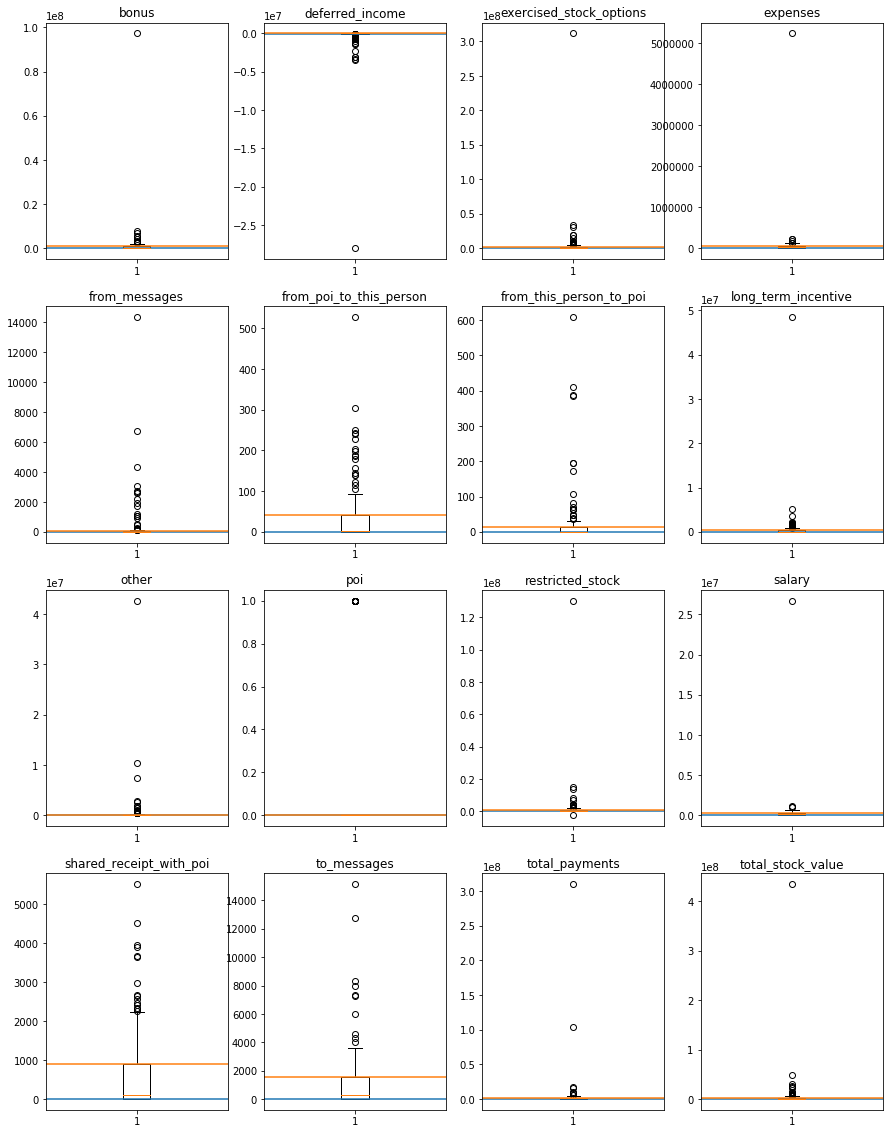

In [20]:
fig, ax = plt.subplots(4, 4, figsize = (15, 20))

for i in xrange(4):
    for j in xrange(4):
        
        #print i*5+j
        #print features[i*5+j]

        per_25th = np.percentile(fp_df[features[i*4+j]], 25)
        per_75th = np.percentile(fp_df[features[i*4+j]], 75)

        x = np.linspace(0, 2, 100)
        y_25th = np.ones(100) * per_25th
        y_75th = np.ones(100) * per_75th
        
        ax[i, j].boxplot(fp_df[features[i*4+j]])
        ax[i, j].plot(x, y_25th, x, y_75th)
        ax[i, j].set_title(features[i*4+j])

In [21]:
features

['bonus',
 'deferred_income',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [26]:
values

array([ 1200000.,   400000.,   700000.,   250000.,  1000000.,   850000.,
        1350000.,   500000.,   750000.,   900000.,  1250000.,   300000.,
        1000000.,  1200000.,   800000.,   325000.,   600000.,   800000.,
         425000.,   600000.,  1000000.,   800000.,   750000.,   350000.,
        1300000.,   350000.,  2000000.,   509870.,   850000.,   600000.,
         750000.,  1150000.,  1500000.,   700000.,  1700000.,   250000.,
         400000.,  1000000.,   700000.,   800000.,  1000000.,   900000.,
        1100000.,   600000.,   325000.,  1100000.,   400000.,   750000.,
        1000000.,   300000.,   400000.,  1750000.,   700000.,  2000000.,
         650000.,   600000.,  1500000.,   500000.,   700000.,   600000.,
         300000.,   788750.,   850000.,   325000.,   450000.])

3000000.0


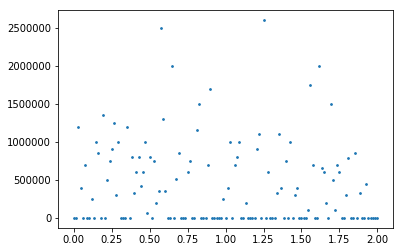

In [23]:
values = fp_df['bonus'].values
#u = np.percentile(values, 25)
d = np.percentile(values, 95)

x = np.linspace(0, 2, len(values))

#print u, d
print d
#plt.scatter(x, values, s = 3)

values = values[values < d]
x = np.linspace(0, 2, len(values))
plt.scatter(x, values, s = 3)

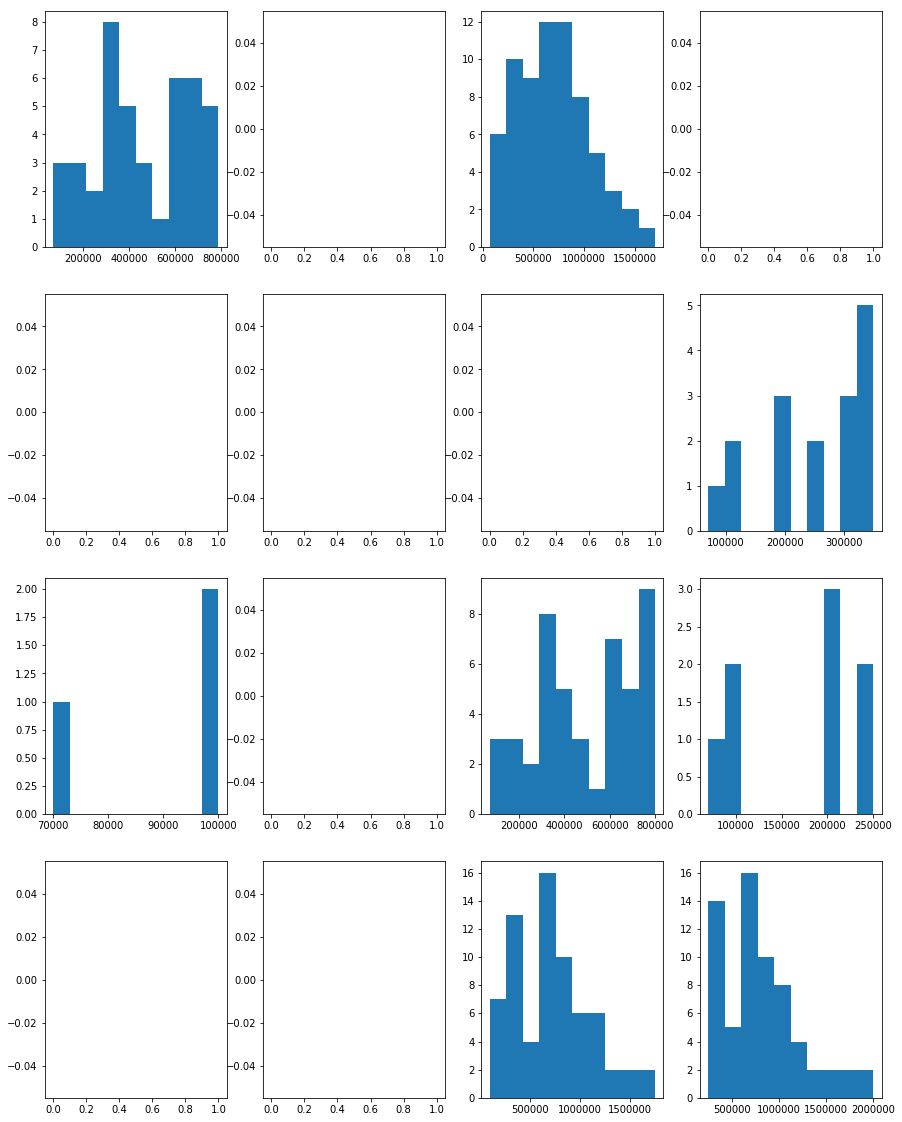

In [25]:
fig, ax = plt.subplots(4, 4, figsize = (15, 20))

for i in xrange(4):
    for j in xrange(4):
        per_25th = np.percentile(fp_df[features[i*4+j]], 25)
        per_75th = np.percentile(fp_df[features[i*4+j]], 75)
        
        values = fp_df['bonus'].values
        values = values[values > per_25th]
        values = values[values < per_75th]
        '''
        x = np.linspace(0, 2, 100)
        y_25th = np.ones(100) * per_25th
        y_75th = np.ones(100) * per_75th
        '''
        #ax[i, j].boxplot(values)
        ax[i, j].hist(values)
        #ax[i, j].plot(x, y_25th, x, y_75th)
        #ax[i, j].set_title(features[i*5+j])

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

sclr = MinMaxScaler(feature_range=(0, 1))

Scaling to have range from 0 to 1, expect email_address variable

In [ ]:
scaled_value = sclr.fit_transform(fp_df[features.drop('email_address')])
#rescaled_value = sclr.fit_transform(fp_df[features.drop('email_address')])

In [ ]:
scaled_value

# References

http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html